# Since women’s roles have changed over time, does the number of films that pass the Bechdel Test increase over time?

We will start this analysis by importing the Bechdel Test data.

In [1]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

bechdel = pd.read_csv('../Data/bechdel_test_data/bechdel_test_updated.csv', index_col=False)

print(bechdel.shape)
print(bechdel.columns)
print(bechdel.dtypes)

(7714, 5)
Index(['bechdel_id', 'imdb_id', 'rating', 'title', 'release_yr'], dtype='object')
bechdel_id     int64
imdb_id       object
rating         int64
title         object
release_yr     int64
dtype: object


In [2]:
bechdel.head()

,bechdel_id,imdb_id,rating,title,release_yr
0,5433,tt0000003,0,Pauvre Pierrot,1892
1,6199,tt0000012,0,"Arrival of a Train, The",1896
2,5444,tt0000014,0,Tables Turned on the Gardener,1895
3,4982,tt0000091,0,"House of the Devil, The",1896
4,5406,tt0000131,0,Une nuit terrible,1896


Here's some quick analysis of the title.basics table from IMDB to see how the Bechdel Test data compares. 

In [37]:
title_basics_df = pd.read_table("../Data/title.basics.tsv", index_col=False)

title_basics_df.shape

C:\Users\elizabeth la ragione\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5150546, 9)

While there are over 5 million rows in title.basics, this actually contains titles other than movies, so let's do a groupby to get a better idea.

In [14]:
group_title = title_basics_df.groupby(['titleType'])['primaryTitle'].count()
group_title

titleType
movie            491745
short            633058
tvEpisode       3480525
tvMiniSeries      23180
tvMovie          125817
tvSeries         149281
tvShort            8521
tvSpecial         11314
video            205367
videoGame         21732
Name: primaryTitle, dtype: int64

In [15]:
group_title['movie'] + group_title['tvMovie']

617562

The Bechdel Test website only has 7714 movies rated compared to 617562 movies in the IMDB title.basics table. Unfortunately, this is a limitation of the analysis due to the data available.

To examine the number of films that pass the Bechdel Test over time, we'll start by dividing the films into release decades.

In [3]:
# creating ranges and labels for binning
ranges = [year for year in range(1869, 2029, 10)]
labels = [str(year) + 's' for year in range(1870, 2020, 10)]

In [4]:
bechdel['release_decade'] = pd.cut(bechdel.release_yr, ranges, labels=labels).astype('category')

In [5]:
bechdel.tail()

,bechdel_id,imdb_id,rating,title,release_yr,release_decade
7709,5142,tt3212568,1,Beltracchi: The Art of Forgery,2013,2010s
7710,5936,tt2121382,3,Turist,2014,2010s
7711,1674,tt0420238,3,"Tale of Despereaux, The",2008,2000s
7712,6521,tt4298966,3,"Murder Pact, The",2015,2010s
7713,474,tt0053285,3,Sleeping Beauty,1959,1950s


In [6]:
rel_decade_table = bechdel.groupby(['release_decade'])['title'].count()
df_rel_decade_table = rel_decade_table.to_frame()
df_rel_decade_table

,title
release_decade,
1870s,0
1880s,1
1890s,12
1900s,42
1910s,26
1920s,79
1930s,190
1940s,206
1950s,248


From this groupby, we can see that we have more Bechdel Test ratings for recent films in the 2000s and 2010s. This likely due to the nature of the Bechdel Test website, which collects data based on user input. It's more likely that people have seen recently released movies rather than those released much earlier. Movies released in the decades between 1880-1940 are also more difficult to find and view. 


Here's a table of the ratings grouped by release_decade.

In [9]:
decade_rating_table = bechdel.groupby(['release_decade', 'rating'])['title'].count()
df_decade = decade_rating_table.to_frame()
df_decade

title
release_decade rating       
1880s          0           1
1890s          0          11
               3           1
1900s          0          39
               1           2
               2           1
1910s          0          11
               2           4
               3          11
1920s          0          36
               1          10
               2          18
               3          15
1930s          0          20
               1          36
               2          42
               3          92
1940s          0          31
               1          42
               2          34
               3          99
1950s          0          36
               1          59
               2          37
               3         116
1960s          0          61
               1          81
               2          34
               3         143
1970s          0          39
               1          97
               2          38
               3         162
1980s          0          68
               1         129
               2          58
               3         306
1990s          0          78
               1         240
               2          95
               3         575
2000s          0         167
               1         467
               2         181
               3        1272
2010s          0         194
               1         526
               2         231
               3        1668

In [10]:
df_decade['percentage'] = df_decade.title / df_decade.reset_index().groupby('release_decade')['title'].sum()
decade_rating_table_format = df_decade.style.format({'percentage': '{0:,.2%}'.format})
decade_rating_table_format

In [22]:
# prepping for stacked bar chart
grouped_bechdel = bechdel.groupby(['release_decade', 'rating'])['title'].count().unstack('rating')
grouped_bechdel

rating,0,1,2,3
release_decade,,,,
1880s,1.0,NaN,NaN,NaN
1890s,11.0,NaN,NaN,1.0
1900s,39.0,2.0,1.0,NaN
1910s,11.0,NaN,4.0,11.0
1920s,36.0,10.0,18.0,15.0
1930s,20.0,36.0,42.0,92.0
1940s,31.0,42.0,34.0,99.0
1950s,36.0,59.0,37.0,116.0
1960s,61.0,81.0,34.0,143.0


In [23]:
# prep for % chart
grouped_bechdel_per = df_decade['percentage'].unstack('rating')
grouped_bechdel_per

rating,0,1,2,3
release_decade,,,,
1880s,1.000000,NaN,NaN,NaN
1890s,0.916667,NaN,NaN,0.083333
1900s,0.928571,0.047619,0.023810,NaN
1910s,0.423077,NaN,0.153846,0.423077
1920s,0.455696,0.126582,0.227848,0.189873
1930s,0.105263,0.189474,0.221053,0.484211
1940s,0.150485,0.203883,0.165049,0.480583
1950s,0.145161,0.237903,0.149194,0.467742
1960s,0.191223,0.253918,0.106583,0.448276


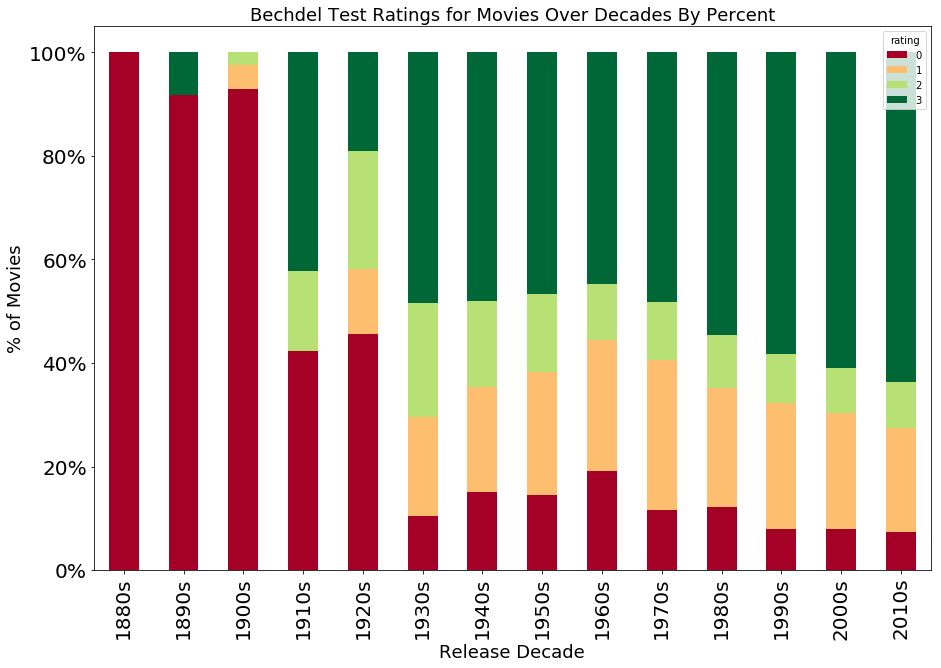

In [33]:
from matplotlib.ticker import FuncFormatter


per_chart = grouped_bechdel_per.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(15,10))
per_chart.set_xlabel('Release Decade', size=18)
per_chart.set_ylabel('% of Movies',size=18)
per_chart.set_title('Bechdel Test Ratings for Movies Over Decades By Percent', size=18)

per_chart.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


In [34]:
fig = per_chart.get_figure()
fig.savefig('bt_ratings_over_decades_per.png', bbox_inches='tight')

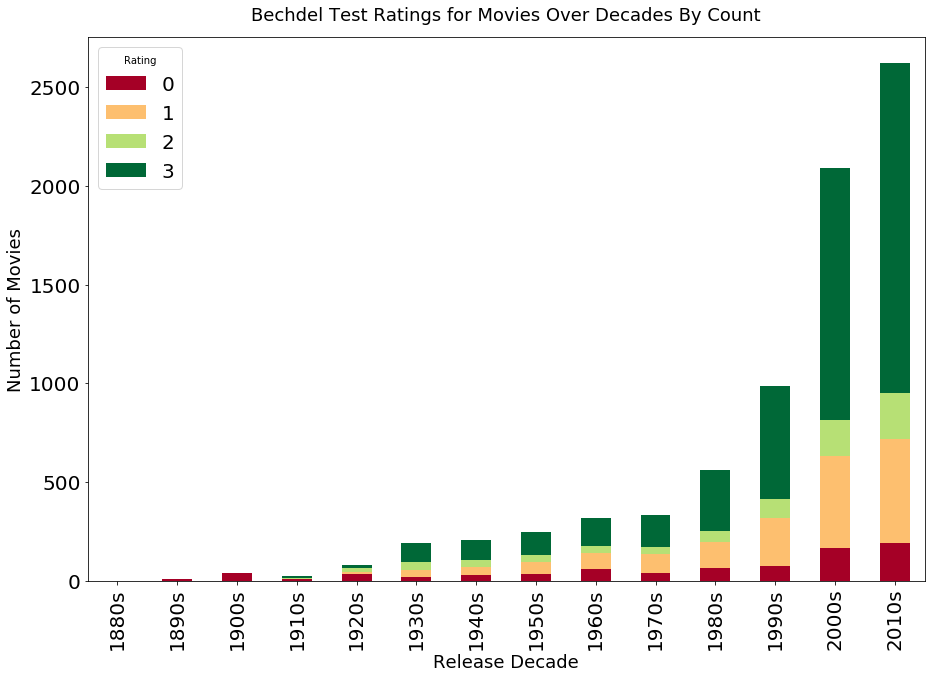

In [35]:
chart = grouped_bechdel.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(15,10))
chart.set_xlabel('Release Decade', size=18)
chart.set_ylabel('Number of Movies', size=18)
chart.set_title('Bechdel Test Ratings for Movies Over Decades By Count', size=18)

# moving the title up a bit
ttl = chart.title
ttl.set_position([0.5, 1.02])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.legend(loc=2, prop={'size': 20}, title='Rating')

chart

In [36]:
fig = chart.get_figure()
fig.savefig('bt_ratings_over_decades2.png', bbox_inches='tight')

# Findings

- While we do see a big increase of movies passing the Bechdel Test in the last two decades, the Bechdel Test dataset is likely skewed due to the nature of how data is collected. There are far more ratings for movies released in the 2000s and 2010s. 
- From the Bechdel Test data, we start to see more movies passing than failing the Bechdel Test in the 1930s and this continues in the decades after.